In [1]:
import numpy as np
import pandas as pd

In [2]:
credit_card_df = pd.read_csv('data/creditcard.csv')

In [4]:
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
credit_card_df.shape

(284807, 31)

In [11]:
labels = credit_card_df.Class.unique()
labels

array([0, 1])

In [13]:
sizes = credit_card_df.Class.value_counts().values
sizes

array([284315,    492])

In [15]:
import matplotlib.pyplot as plt

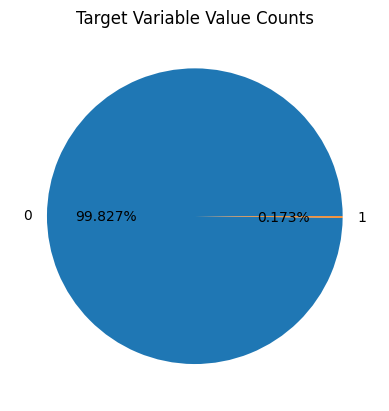

In [16]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

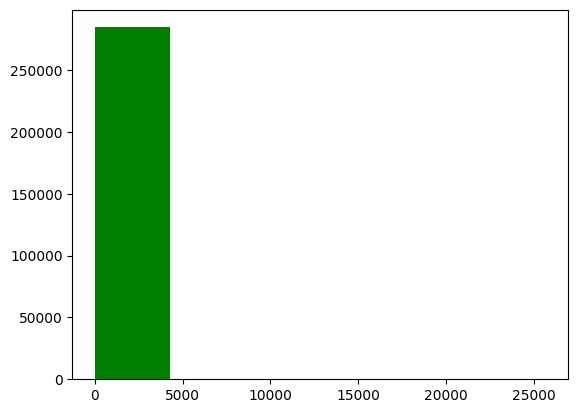

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [18]:
# we provide our solution here
plt.hist(credit_card_df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(credit_card_df.Amount.values))
print("Maximum amount value is ", np.max(credit_card_df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(credit_card_df.Amount.values, 90))

In [25]:
from sklearn.preprocessing import StandardScaler, normalize

In [21]:
credit_card_df.iloc[:, 1:30] = StandardScaler().fit_transform(credit_card_df.iloc[:, 1:30])
data_matrix = credit_card_df.values

In [22]:
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

In [23]:
# y: labels vector
y = data_matrix[:, 30]

In [26]:
X = normalize(X, norm="l1")

In [27]:
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (199364, 29) Y_train.shape= (199364,)
X_test.shape= (85443, 29) Y_test.shape= (85443,)


In [32]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier

In [33]:
w_train = compute_sample_weight('balanced', y_train)

In [35]:
credit_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
credit_dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [36]:
y_pred = credit_dt.predict_proba(X_test)[:,1]

In [37]:
from sklearn.metrics import roc_auc_score
cred_roc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC score : {0:.3f}'.format(cred_roc_score))

ROC-AUC score : 0.937
